# Dataload and import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [2]:
## 본인의 디렉토리에 맞게 설정하세요 
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
#Salary 단위 변환 
data['salary']=data['salary'].apply(lambda x : x/10000)

# Logistic regression 해야하는 data 의 scatter plot

In [7]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


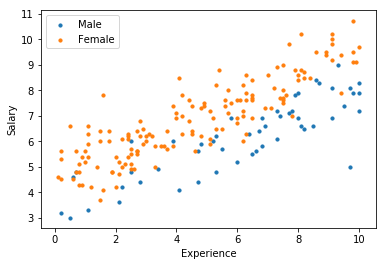

In [8]:

# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [9]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)


# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)


# 회귀계수
#beta = np.random.randn(3)
beta= np.array([1,1,1])


In [10]:
beta

array([1, 1, 1])

In [11]:
T

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1])

## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [12]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)

## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [13]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
P = sigmoid(a)

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

In [15]:
L = 1
for idx in range(len(T)):
    if T[idx] == 1:
        L *= P[idx]
    else :
        L *= (1-P[idx])

In [16]:
L

6.946445682265916e-117

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = y\sigma(x,B) + (1-y)(1-\sigma(x,B)) $$ 

In [17]:
L_ = np.log(L)

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ Likelihood  $$
## $$ J(x_i,y_i|B) = -\sum_{i=1}^N y_i\sigma(x_i,B)- \sum_{i=1}^N(1-y_i)(1-\sigma(x_i,B)) $$ 


In [18]:
'''
Negative_Likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative_Likelihood 값의 합

'''
def neg_likelihood(p, label):
    L = 1
    for idx in range(len(T)):
        if T[idx] == 1:
            L *= P[idx]
        else :
            L *= (1-P[idx])
    L_ = np.log(L)
    J = - L_
    return J

In [19]:
J = neg_likelihood(P,T)
J

267.4642257641663

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(y-P)$$ 

In [20]:
T.shape[0]

200

In [21]:
'''
위에서 구한 Negative Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''
#Initialize learning rate to 0.05, iterations to 1000
lr = 0.05
iterations = 1000
beta= np.array([1,1,1])


#Gradient 식을 수정했습니다.
gradient = np.dot(X.T, (P-T))/ T.shape[0]   #gradient = np.dot(X.T, (T-a))

#cost값과 beta 에 변화를 저장하는 변수
cost_log = np.zeros(iterations)
beta_log = np.zeros((iterations,3))



In [24]:
for it in range(iterations):
    a = X.dot(beta)
    P = sigmoid(a)
    gradient = np.dot(X.T, (P-T))/ T.shape[0]
    beta = beta - lr*gradient
    cost_log[it] = neg_likelihood(P,T)   
    beta_log[it,:] = beta.T
    
    #매 50 회 마다 cost 출력
    if it%50 ==0 :
        print('Cost at {0} : {1:.2f}'.format(str(it),cost_log[it]))

Cost at 0 : 261.56
Cost at 50 : 151.23
Cost at 100 : 111.20
Cost at 150 : 98.18
Cost at 200 : 91.65
Cost at 250 : 87.27
Cost at 300 : 83.91
Cost at 350 : 81.18
Cost at 400 : 78.88
Cost at 450 : 76.92
Cost at 500 : 75.22
Cost at 550 : 73.74
Cost at 600 : 72.44
Cost at 650 : 71.29
Cost at 700 : 70.26
Cost at 750 : 69.35
Cost at 800 : 68.52
Cost at 850 : 67.78
Cost at 900 : 67.11
Cost at 950 : 66.50


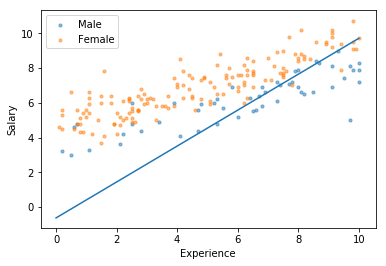

In [25]:
'''추정된 회귀계수가 beta=[B0,B2,B3]이라면, 다음 코드를 통해 시각화가 가능합니다'''


fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()





### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다